<a href="https://colab.research.google.com/github/KarlieChadwick/MAT421/blob/Chapter-9/Chapter_19_MAT_421%2C_Karlie_Chadwick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 19

Karlie Chadwick

**19.1: Root Finding Problem Statement**

Roots can be found in simple polynomial functions using the quadratic equation: $x = \frac{-b ± \sqrt{b^2 - 4ac}}{2a}$ given the polynomial $f(x) = ax^2+bx+c$

For example, $x^2-4$ can be plugged into the quadratic equation: $x = \frac{-(0) ± \sqrt{(0)^2-4(1)(-4)}}{2(1)} = ±2$

Python functions can be helpful to employ when dealing with more complicated functions like $f(x)=cos(x)-x$ or functions with undefined roots like $f(x) = \frac{1}{x}$

*1) Find the root of $f(x) = x^2 - 4$ near the value -2*

In [ ]:
import numpy as np
from scipy import optimize

# After importing the optimize and np functions, the equation is
# inputed and the function 'optimize' is used to find the root of
# the given equation near a given number; in this case -2.

f = lambda x: x**2 - 4
r = optimize.fsolve(f, -2)
print("r =", r)

# After the root is found, it is plugged back into the equation to
# verify the number is acutally a root. The results will print out
# zero if it is a root. 

result = f(r)
print("result=", result)

r = [-2.]
result= [0.]


*2) Find the root of $f(x) = cos(x) - x$ near the value -4*

In [ ]:
import numpy as np
from scipy import optimize

f = lambda x: np.cos(x) - x
r = optimize.fsolve(f, -4)
print("r =", r)

result = f(r)
print("result=", result)

r = [0.73908513]
result= [0.]


*3) Find the root of $f(x) = \frac{1}{x}$ near the value -1*

In [ ]:
import numpy as np
from scipy import optimize

f = lambda x: 1/x
r = optimize.fsolve(f, -1)
print("r =", r)

result = f(r)
print("result=", result)

r = [-1.7602368e+83]
result= [-5.68105383e-84]


In the above code the equation was $f(x)=\frac{1}{x}$ and the result from inputing the root is not 0. This means the root found is not really a root! If we turn on full_output, we can see what went wrong.

In [ ]:
import numpy as np
from scipy import optimize

f = lambda x: 1/x

# full_output was set equal to True and the mesg was printed below
# to determine the error when calculating this equations root

r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print("r =", r)

result = f(r)
print("result=", result)

print(mesg)

r = [-3.52047359e+83]
result= [-2.84052692e-84]
The number of calls to function has reached maxfev = 400.


After the displayed message we know now that the equation has no root solutions. The function was evaluated 400 times to find a root and no solution was able to be found.


---

**19.2: Tolerance**

Error can be defined as the deviation from the expected value and mostly seen in engineering and science problems. Tolerance is how much variation/error is acceptable in a solution. Tolerance can vary based on the application; if a small variation in the answer could be detrimental, the tolerance is likely very low. A converged solution is a computers solution that has an error smaller than the given tolerance.

In order to determine a tolerance, two main equations can be used:

* $error = |f(x)|$
* $error = |x_{i+1}-x_i|$

Both have advantages and disadvantages and should be employed based on the context of the problem. 


---

**19.3: Bisection Method**

The bisection method of finding roots uses the intermediate value theorem that states if the function f(x) is continuous between two points that cross the x axis, there must be a point that lies within the line where f(x) = 0.

In order to compute this value automatically the midpoint is found between the two points. If the midpoint is greater than zero, the midpoint between the first midpoint and right boundary is found to get closer to f(x) = 0 and vice versa if it is less than zero. This iteration continues until the root is found. 

*1) Create a function my_bisection that can find the root of an equation with given boundaries and tolerance.*

In [3]:
import numpy as np

# After importing the np function, a new function my_bisection
# is created with 4 inputs: f is the given function, a is the
# lower bound, b is the upper bound, and tol is the tolerance
# the root is allowed to be within.

def my_bisection(f, a, b, tol): 
    
    # This if statement will determine if the two boundaries
    # are able to find a root (in this case the function must
    # cross the x axis)
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
        
    # if the boundaries are within the parameters, the midpoint
    # is found.
    m = (a + b)/2
    
    # After the initial midpoint is found if the root is within
    # the tolerance, the root is returned.
    if np.abs(f(m)) < tol:
        return m

    # If the initial midpoint is an improvement on the a boundary
    # the midpoint is refound between the new boundaries until the
    # root is found
    elif np.sign(f(a)) == np.sign(f(m)):
        return my_bisection(f, m, b, tol)

    # If the initial midpoint is an improvement on the b boundary
    # the midpoint is refound between the new boundaries until the
    # root is found
    elif np.sign(f(b)) == np.sign(f(m)):
        return my_bisection(f, a, m, tol)

*2) Employ my_bisection to find the root of $f(x) = x^3 - 2$ between -5 and 5 with a tolerance of 0.1 and 0.01.*

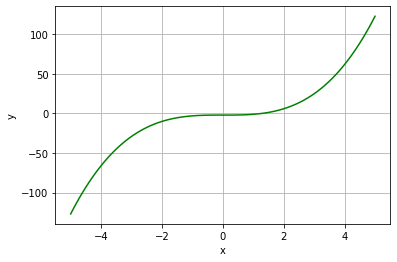

The root with a tolerance of 0.1 is 1.25
The root with a tolerance of 0.01 is 1.259765625
f(root1) = -0.046875
f(root01) = -0.0007400736212730408


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# I imported a plt function to graph the given equation to visualize
# where the root is and how the bisection method works. 

x = np.linspace(-5,5,100)

y = x**3 - 2

fig = plt.figure()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'g')
plt.show()

# After graphing the equation, the function f is defined to input into
# my_bisection. Then the function is employed with two differing
# tolerances to see how the answer changes. After the roots are returned
# the function with the inputed root is also printed to see how close 
# to zero the answer is!

f = lambda x: x**3 - 2

root1 = my_bisection(f, -5, 5, 0.1)
print("The root with a tolerance of 0.1 is", root1)
root01 = my_bisection(f, -5, 5, 0.01)
print("The root with a tolerance of 0.01 is", root01)

print("f(root1) =", f(root1))
print("f(root01) =", f(root01))

*3) Employ my_bisection to find the root of $f(x) = x^5 - 4x + 1$ between -3 and 3 with a tolerance of 0.1 and 0.001.*

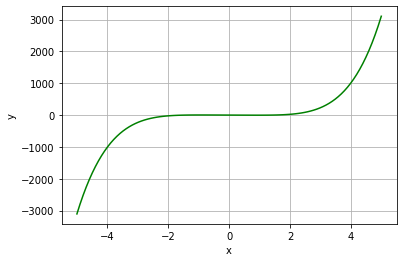

The root with a tolerance of 0.1 is -1.470703125
The root with a tolerance of 0.001 is -1.470794677734375
f(root1) = 0.0022320659431613876
f(root001) = 0.00045639530279917295


In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)

y = x**5 - 4*x + 1

fig = plt.figure()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'g')
plt.show()

f = lambda x: x**5 - 4*x + 1

root1 = my_bisection(f, -3, 3, 0.1)
print("The root with a tolerance of 0.1 is", root1)
root001 = my_bisection(f, -3, 3, 0.001)
print("The root with a tolerance of 0.001 is", root001)

print("f(root1) =", f(root1))
print("f(root001) =", f(root001))

*4) Employ my_bisection to find the root of $f(x) = x^2 - 5$ between -1 and 3 with a tolerance of 0.1 and 0.001.*

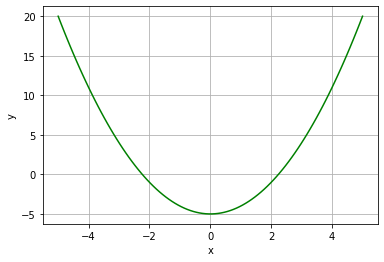

The root with a tolerance of 0.1 is 2.25
The root with a tolerance of 0.001 is 2.236083984375
f(root1) = 0.0625
f(root001) = 7.158517837524414e-05


In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)

y = x**2 - 5

fig = plt.figure()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'g')
plt.show()

f = lambda x: x**2 - 5

root1 = my_bisection(f, -1, 3, 0.1)
print("The root with a tolerance of 0.1 is", root1)
root001 = my_bisection(f, -1, 3, 0.001)
print("The root with a tolerance of 0.001 is", root001)

print("f(root1) =", f(root1))
print("f(root001) =", f(root001))



---



**19.4: Newton-Raphson Method**

The Newton-Raphson method is another method used to find roots on a given function. In this method, a linear approximation equation is used and then built on by a Newton step to get closer and closer to the root until solved. The linear approximation can be written as $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$ and the Newton step to improve the root can be written as $x_i = x_{i-1}-\frac{g(x_{i-1})}{g'(x_{i-1})}$.

*1) Find the root of the equation $f(x) = x^2 - 4$ using the Newton-Raphson method and $x_0 = 1.9$ as the starting point.*

In [7]:
import numpy as np

# Both the function and the function derivative are given
# to be used in the newton_raphson equation which will find
# the root of the equation using a given starting point.

f = lambda x: x**2 - 4
f_prime = lambda x: 2*x
newton_raphson = 1.9 - (f(1.9))/(f_prime(1.9))

print("Using the Newton-Raphson method, the root is", newton_raphson)

Using the Newton-Raphson method, the root is 2.0026315789473683


*2) Find the root of the equation $f(x) = x^2 - 2x - 3$ using the Newton-Raphson methon and $x_0 = 2.9$ as the starting point*

In [6]:
f = lambda x: x**2 - 2*x - 3
f_prime = lambda x: 2*x - 2
newton_raphson = 2.9 - (f(2.9))/(f_prime(2.9))

print("Using the Newton-Raphson method, the root is", newton_raphson)

Using the Newton-Raphson method, the root is 3.0026315789473683


*3) Find the root of the equation $f(x) = x^2 - 5x - 5$ using the Newton-Raphson methon and $x_0 = 5.8$ as the starting point*

In [8]:
f = lambda x: x**2 - 5*x - 5
f_prime = lambda x: 2*x - 5
newton_raphson = 5.8 - (f(5.8))/(f_prime(5.8))

print("Using the Newton-Raphson method, the root is", newton_raphson)

Using the Newton-Raphson method, the root is 5.8545454545454545




---



**19.5: Root Finding in Python**

Aside from the methods we have discussed to solve the roots of a function, python has a preexisting root finder to make the process easier!

*1) Find the roots of the function $f(x) = x^5 - 30x^2 - x + 40$.*

In [66]:
from scipy.optimize import fsolve

f = lambda x: x**5-30*x**2-x+40

fsolve(f, [-10, 10])

array([-1.14298223,  1.16927933])

The function fsolve will return an array with all the roots of an equation!


*2) Find the roots of the function $f(x) = x^2 -4$.*

In [67]:
f = lambda x: x**2 - 4

fsolve(f, [-10, 10])

array([-2.,  2.])

*3) Find the roots of the function $f(x) = x^3 - 15x^2 +5x -10$.*

In [68]:
f = lambda x: x**3-15*x**2+5*x-10

fsolve(f, [-10, 10])

array([ 0.16967488, 14.70624613])